In [7]:
# Import libraries
import pandas as pd
import numpy as np

# Load the dataset
file_name = 'Sample_Superstore.csv' 
try:
    # --- FIX: ADD THE 'encoding' PARAMETER ---
    # We will try 'latin1' first, as it solves this error often.
    df = pd.read_csv(file_name, encoding='latin1') 
    print("Data loaded successfully!")
    
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Check the file name and path.")
except UnicodeDecodeError:
    # Fallback to try another common encoding if 'latin1' fails
    try:
        df = pd.read_csv(file_name, encoding='cp1252')
        print("Data loaded successfully using cp1252 encoding!")
    except:
        print("Error: Failed to load data with multiple encodings. The file might be corrupted.")
    
# Display the first few rows and check data types
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nData Information (Check for missing values and wrong data types):")
df.info()

Data loaded successfully!

First 5 rows of the dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product 

In [8]:
# --- A. Date Conversion ---
# The dates are in M/D/YYYY format (e.g., 11/8/2016).
# Pandas can usually infer this, but explicitly setting 'M/D/YYYY' is safest.
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
print("Successfully converted 'Order Date' and 'Ship Date' to datetime objects.")

# --- B. Column Cleanup ---
# 1. Drop 'Row ID' as it is a redundant index.
df = df.drop(columns=['Row ID'])
print("Dropped the redundant 'Row ID' column.")

# 2. Convert 'Postal Code' to object (string)
df['Postal Code'] = df['Postal Code'].astype(str)
print("Converted 'Postal Code' to string type.")

# Re-check the data info to confirm changes
print("\n--- Confirmed Data Types ---")
df.info()

Successfully converted 'Order Date' and 'Ship Date' to datetime objects.
Dropped the redundant 'Row ID' column.
Converted 'Postal Code' to string type.

--- Confirmed Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   object        
 11  Region         9994 non-null   object      

In [9]:
# --- A. Profitability Metrics ---

# 1. Profit Margin (%)
# This shows how efficient sales are at generating profit.
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100
print("Created 'Profit Margin' column.")

# --- B. Time-Based Metrics ---

# 2. Order Year and Month-Year
# Essential for time series analysis and grouping.
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month-Year'] = df['Order Date'].dt.to_period('M') # Use .dt.to_period('M') for easy grouping
print("Created Year, Month, and Month-Year columns.")

# 3. Days to Ship
# Calculates the efficiency of shipping.
df['Shipping Duration (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days
print("Created 'Shipping Duration (Days)' column.")

# Display the head of the new columns and key metrics
print("\n--- Sample of New Features ---")
print(df[['Order Date', 'Shipping Duration (Days)', 'Sales', 'Profit', 'Profit Margin']].head())

Created 'Profit Margin' column.
Created Year, Month, and Month-Year columns.
Created 'Shipping Duration (Days)' column.

--- Sample of New Features ---
  Order Date  Shipping Duration (Days)     Sales    Profit  Profit Margin
0 2016-11-08                         3  261.9600   41.9136          16.00
1 2016-11-08                         3  731.9400  219.5820          30.00
2 2016-06-12                         4   14.6200    6.8714          47.00
3 2015-10-11                         7  957.5775 -383.0310         -40.00
4 2015-10-11                         7   22.3680    2.5164          11.25


In [10]:
# Check descriptive statistics for numerical columns
print("--- Descriptive Statistics for Sales and Profit ---")
print(df[['Sales', 'Profit', 'Discount', 'Quantity']].describe().T)

# Check the date range of the dataset
min_date = df['Order Date'].min()
max_date = df['Order Date'].max()
print(f"\nData spans from {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}.")
print(f"Total rows: {len(df)}")

--- Descriptive Statistics for Sales and Profit ---
           count        mean         std       min       25%      50%  \
Sales     9994.0  229.858001  623.245101     0.444  17.28000  54.4900   
Profit    9994.0   28.656896  234.260108 -6599.978   1.72875   8.6665   
Discount  9994.0    0.156203    0.206452     0.000   0.00000   0.2000   
Quantity  9994.0    3.789574    2.225110     1.000   2.00000   3.0000   

              75%        max  
Sales     209.940  22638.480  
Profit     29.364   8399.976  
Discount    0.200      0.800  
Quantity    5.000     14.000  

Data spans from 2014-01-03 to 2017-12-30.
Total rows: 9994


Matplotlib is building the font cache; this may take a moment.


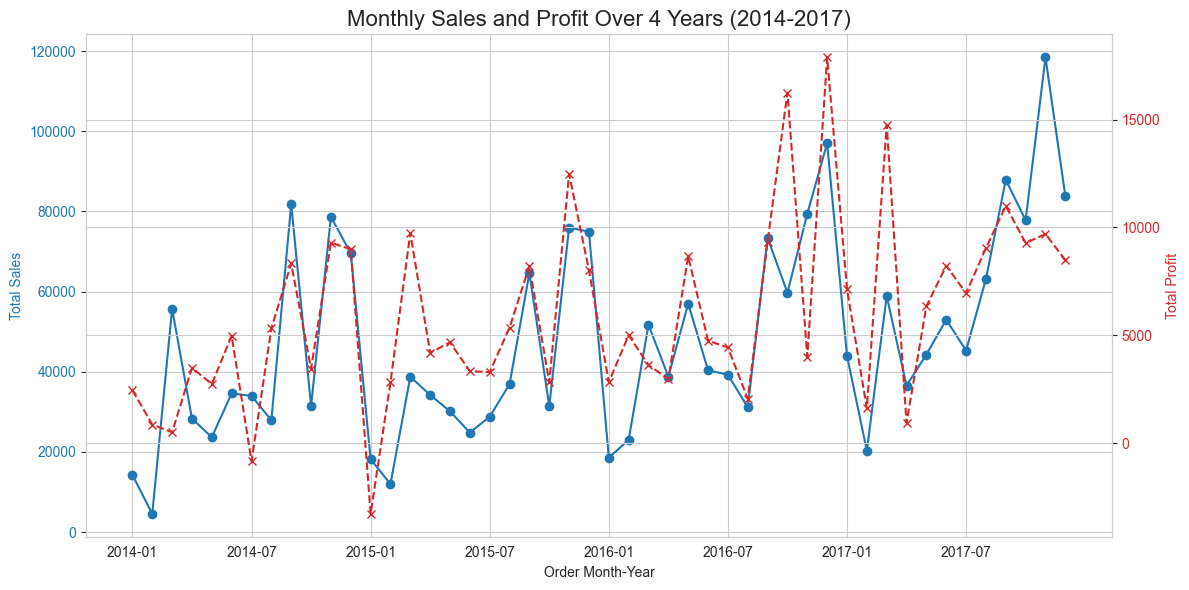


--- Annual Sales and Profit Totals ---
                  Sales      Profit
Order Year                         
2014        484247.4981  49543.9741
2015        470532.5090  61618.6037
2016        609205.5980  81795.1743
2017        733215.2552  93439.2696


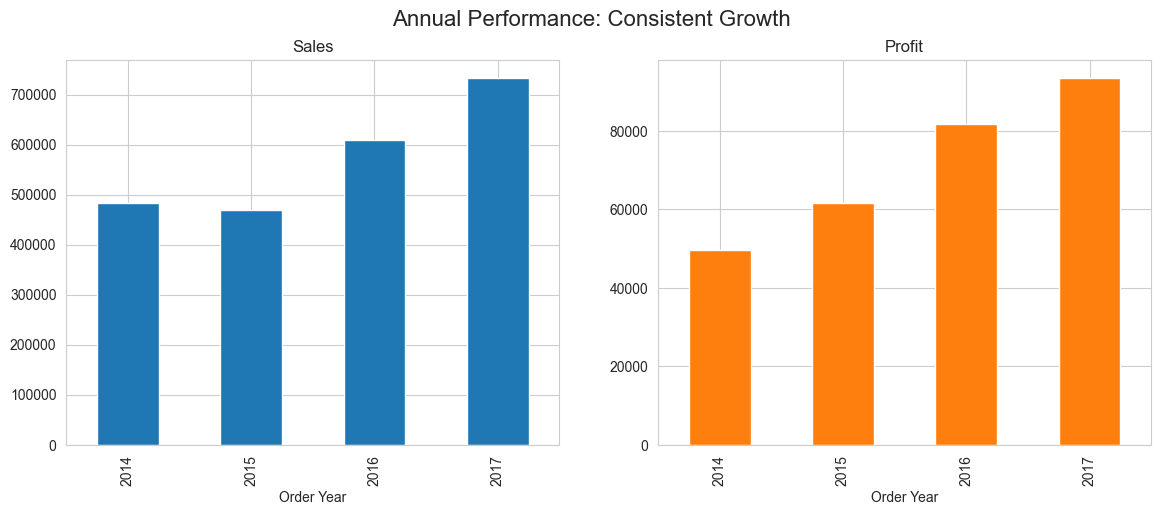

In [11]:
# Install libraries for visualization
!pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns
import calendar # Used for mapping month numbers to names

# Set default style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Group data by Order Month-Year and calculate total Sales and Profit
monthly_performance = df.groupby('Order Month-Year')[['Sales', 'Profit']].sum().reset_index()
monthly_performance['Order Month-Year'] = monthly_performance['Order Month-Year'].astype(str) # Convert Period to string for plotting

# --- Plot 1: Monthly Sales and Profit Trend ---
fig, ax1 = plt.subplots()

# Plot Sales on the left axis
color = 'tab:blue'
ax1.set_xlabel('Order Month-Year')
ax1.set_ylabel('Total Sales', color=color)
ax1.plot(monthly_performance['Order Month-Year'], monthly_performance['Sales'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Monthly Sales and Profit Over 4 Years (2014-2017)', fontsize=16)

# Use a secondary axis for Profit
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Total Profit', color=color)  
ax2.plot(monthly_performance['Order Month-Year'], monthly_performance['Profit'], color=color, marker='x', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Improve x-axis readability (show every 6th month)
plt.xticks(monthly_performance['Order Month-Year'][::6], rotation=45)
plt.grid(True)
fig.tight_layout()
plt.show()

# --- Plot 2: Annual Totals ---
annual_performance = df.groupby('Order Year')[['Sales', 'Profit']].sum()
print("\n--- Annual Sales and Profit Totals ---")
print(annual_performance)

# Plot annual bar chart
annual_performance.plot(kind='bar', subplots=True, layout=(1, 2), figsize=(14, 5), legend=False)
plt.suptitle('Annual Performance: Consistent Growth', fontsize=16)
plt.show()

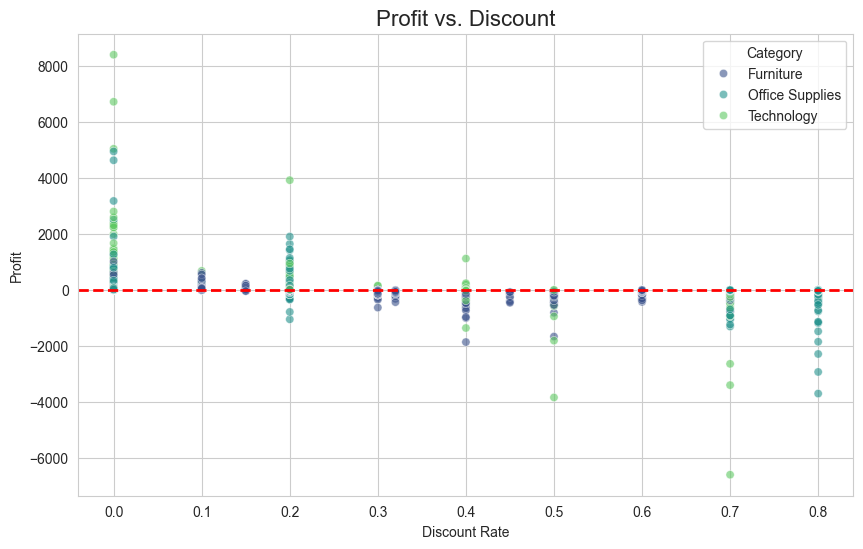


--- Summary of Profit by Discount Level ---
          count        mean          sum
Discount                                
0.50         66 -310.703456  -20506.4281
0.45         11 -226.646464   -2493.1111
0.40        206 -111.927429  -23057.0504
0.80        300 -101.796797  -30539.0392
0.70        418  -95.874060  -40075.3569
0.32         27  -88.560656   -2391.1377
0.30        227  -45.679636  -10369.2774
0.60        138  -43.077212   -5944.6552
0.20       3657   24.702572   90337.3060
0.15         52   27.288298    1418.9915
0.00       4798   66.900292  320987.6032
0.10         94   96.055074    9029.1770


In [12]:
# Import libraries (assuming they were imported in the previous step)
import matplotlib.pyplot as plt
import seaborn as sns

# --- Plot 3: Profit vs. Discount Scatter Plot ---
plt.figure(figsize=(10, 6))
# Create the scatter plot
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category', palette='viridis', alpha=0.6)

plt.title('Profit vs. Discount', fontsize=16)
plt.xlabel('Discount Rate')
plt.ylabel('Profit')

# Draw a red horizontal line at Profit = 0 to clearly separate profits from losses
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)

plt.show()

# --- Quantitative Loss Analysis ---
# Group the data to see the average profit for each discount level
discount_profit = df.groupby('Discount')['Profit'].agg(['count', 'mean', 'sum'])
print("\n--- Summary of Profit by Discount Level ---")
print(discount_profit.sort_values(by='mean', ascending=True))


--- Total Profit by Category ---
Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


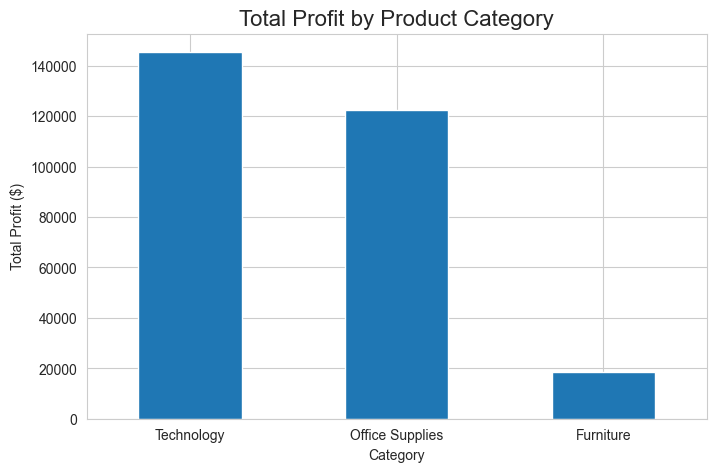


--- Total Profit by Sub-Category ---
Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64


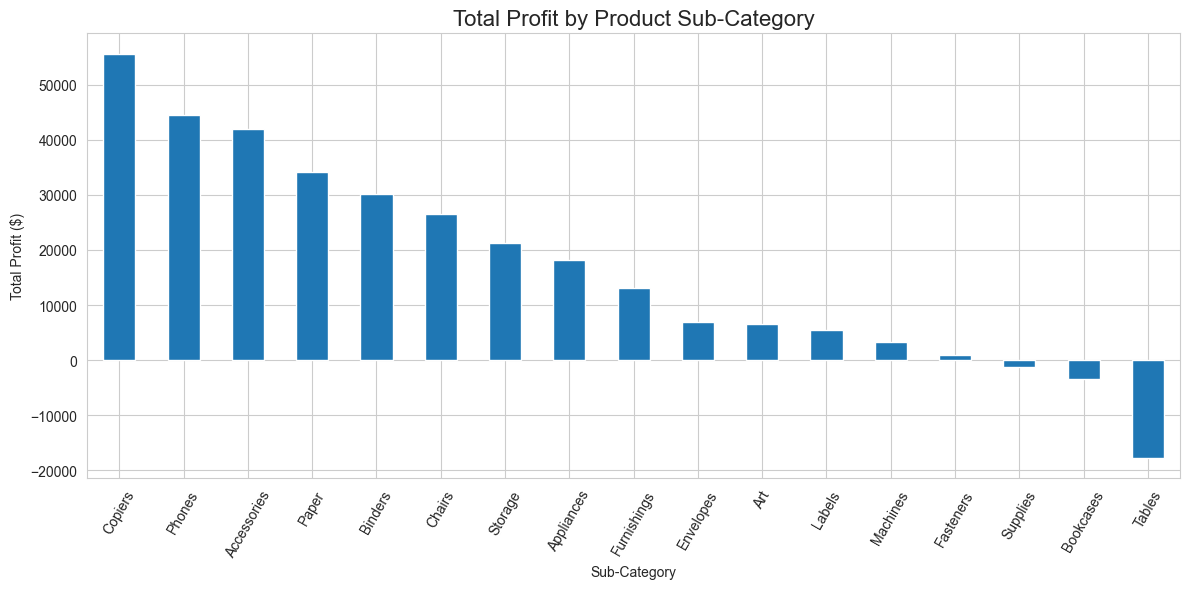

In [13]:
# --- Plot 4: Total Profit by Category ---
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print("\n--- Total Profit by Category ---")
print(category_profit)

plt.figure(figsize=(8, 5))
category_profit.plot(kind='bar')
plt.title('Total Profit by Product Category', fontsize=16)
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=0)
plt.show()

# --- Plot 5: Total Profit by Sub-Category ---
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
print("\n--- Total Profit by Sub-Category ---")
print(subcategory_profit)

plt.figure(figsize=(12, 6))
subcategory_profit.plot(kind='bar')
plt.title('Total Profit by Product Sub-Category', fontsize=16)
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()
